In [24]:
# Import libraries 
import math
import scipy
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
features = ['marker_0_x', 'marker_0_y', 'marker_0_z', 'marker_11_x', 'marker_11_y', 'marker_11_z', 'marker_12_x', 'marker_12_y', 'marker_12_z', 'marker_13_x',  'marker_13_y',  'marker_13_z', 
    'marker_14_x', 'marker_14_y', 'marker_14_z','marker_15_x', 'marker_15_y', 'marker_15_z', 'marker_16_x', 'marker_16_y', 'marker_16_z', 'marker_23_x', 'marker_23_y', 'marker_23_z',
    'marker_24_x', 'marker_24_y', 'marker_24_z', 'marker_25_x', 'marker_25_y', 'marker_25_z','marker_26_x', 'marker_26_y', 'marker_26_z', 'marker_27_x', 'marker_27_y', 'marker_27_z', 'marker_28_x', 'marker_28_y', 'marker_28_z']

In [27]:
def plotJointMovement(subj, movem, marker, df):
  times = []
  values = []
  for _, row in df.iterrows():
    times.append(row['timestamp'])
    values.append(row[marker])
  plt.plot(times, values)
  plt.ylabel(marker)
  plt.xlabel('Time (ms)')
  plt.title(df['subject'][0] + ' RTP')

## Plotting 
def pca_2dplot(X, title):
  plt.style.use("fivethirtyeight")
  plt.figure(figsize=(8, 8))
  scat = sns.scatterplot(
      "pc1",
      "pc2",
      s=50,
      data=X,
      hue="true",
      palette="Set2",
  )
  scat.set_title(title)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
  plt.show()

In [ ]:
# Load relevant data for scores
dfs = pd.read_excel('/content/drive/MyDrive/Thesis/Data/Scores.xlsx')

rtp = pd.DataFrame(data = [dfs.iloc[0][2:].values, dfs.iloc[1][2:].values, dfs.iloc[2][2:].values, dfs.iloc[3][2:].values, dfs.iloc[4][2:].values])
push = pd.DataFrame(data = [dfs.iloc[5][2:].values, dfs.iloc[6][2:].values, dfs.iloc[7][2:].values, dfs.iloc[8][2:].values, dfs.iloc[9][2:].values])
grasp = pd.DataFrame(data = [dfs.iloc[10][2:].values, dfs.iloc[11][2:].values, dfs.iloc[12][2:].values, dfs.iloc[13][2:].values, dfs.iloc[14][2:].values])
clouds = pd.DataFrame(data = [dfs.iloc[15][2:].values, dfs.iloc[16][2:].values, dfs.iloc[17][2:].values, dfs.iloc[18][2:].values, dfs.iloc[19][2:].values])
step = pd.DataFrame(data = [dfs.iloc[20][2:].values, dfs.iloc[21][2:].values, dfs.iloc[22][2:].values, dfs.iloc[23][2:].values, dfs.iloc[24][2:].values])
rooster = pd.DataFrame(data = [dfs.iloc[25][2:].values, dfs.iloc[26][2:].values, dfs.iloc[27][2:].values, dfs.iloc[28][2:].values, dfs.iloc[29][2:].values])

rtp, push, grasp, clouds, step, rooster = rtp.T, push.T, grasp.T, clouds.T, step.T, rooster.T
rtp.columns = ['GC', 'Yin/Yang', 'Align/Post', 'Flow/Int', 'Range']
push.columns = ['GC', 'Yin/Yang', 'Align/Post', 'Flow/Int', 'Range']
grasp.columns = ['GC', 'Yin/Yang', 'Align/Post', 'Flow/Int', 'Range']
clouds.columns = ['GC', 'Yin/Yang', 'Align/Post', 'Flow/Int', 'Range']
step.columns = ['GC', 'Yin/Yang', 'Align/Post', 'Flow/Int', 'Range']
rooster.columns = ['GC', 'Yin/Yang', 'Align/Post', 'Flow/Int', 'Range']

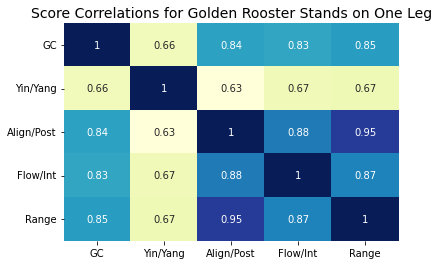

In [ ]:
## Score Correlation Heat Maps
dataplot = sns.heatmap(rooster.corr(), cmap="YlGnBu", annot=True, cbar= False) # Plotting correlation heatmap
plt.title('Score Correlations for Golden Rooster Stands on One Leg', fontdict = {'fontsize' : 14})
plt.show() # Displaying heatmap

In [25]:
# Load data 
df = pd.read_csv('/content/drive/MyDrive/Thesis/Data/RTP_FeaturesV3.csv')
df = df.dropna()
X = df.iloc[:, 4:-3]
yG = df['score_Gr']
yF = df['score_Fl']
yA =df['score_Al']
features = X.columns

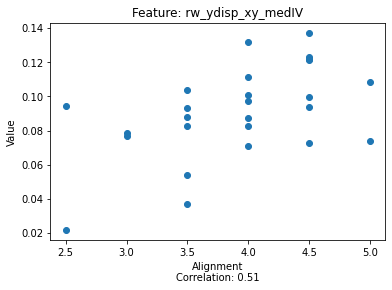

In [22]:
# Plot the features vs score for each feature
metric = yA
label = 'Alignment' #'Gross Competency'
# Plot 
for i in range(len(features)):
  val, p = scipy.stats.pearsonr(X.iloc[:, i], metric)
  if abs(val) > 0.51: 
    plt.figure()
    plt.scatter(metric, X.iloc[:, i])
    plt.title('Feature: ' + features[i])
    plt.xlabel(label + '\n' + 'Correlation: ' + str(round(val, 2)) )
    plt.ylabel('Value')
    # plt.savefig(label + ', ' + features[i])